In [22]:
!pip install scikit-learn
import sklearn
print(sklearn.__version__)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


1.5.1


# Type of transformation
1. Normazlization and Standardization
2. Scaling to minimum and maximum values
3. Scaling to median and qunatiles
4. Guassian transformation logarithm transformation reciprocal transfomartion of square root transformation exonetail
   transformation box cox transoformation

#### Standarization
we try to bring all variables or features to a similar scale
it means centering the variable to zero
z = (x-x_mean)/std

In [33]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df  = pd.read_csv("titanic.csv", usecols=["Pclass","Age","Fare","Survived"])

In [34]:
df.head(3)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250


In [35]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [36]:
df.isnull().sum()


Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [37]:
df["Age"].fillna(df.Age.median() , inplace =  True)

In [38]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

##### we use standarad scaler from sklearn

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
### fit vs fit_transform
df_scaled = scaler.fit_transform(df)

In [43]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

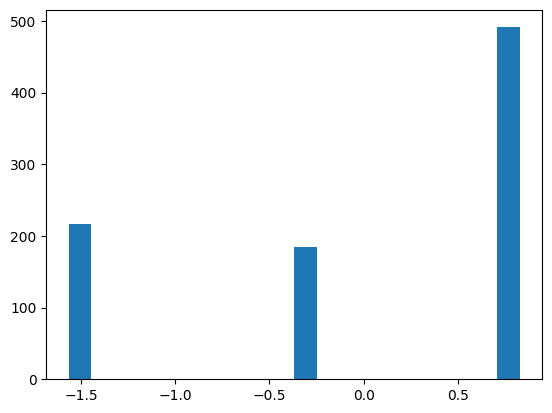

In [49]:
plt.hist(df_scaled[:,1], bins = 20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

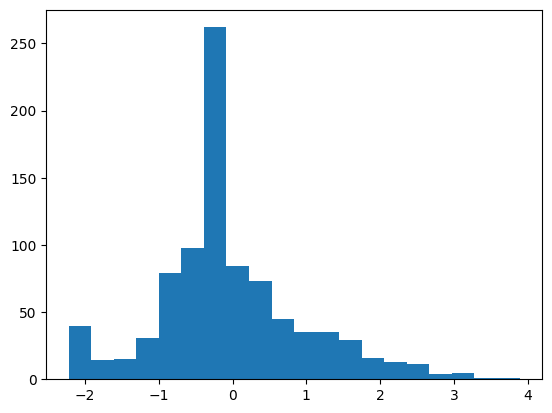

In [50]:
plt.hist(df_scaled[:,2], bins = 20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

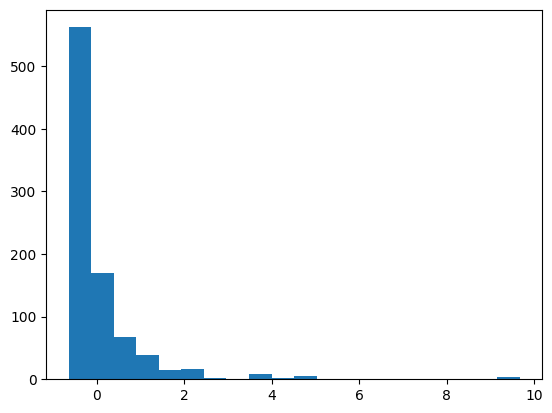

In [51]:
plt.hist(df_scaled[:,3], bins = 20)

fare has lot of oultier if lot of outler transformation will be bulshit

# Min Max Scaling(deep learning - cnn)
it tranform or sclaes the value between 0 and 1
x_scale = (x - x.min / x.max - x.min)

In [54]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df) ,  columns = df.columns)
df_minmax

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

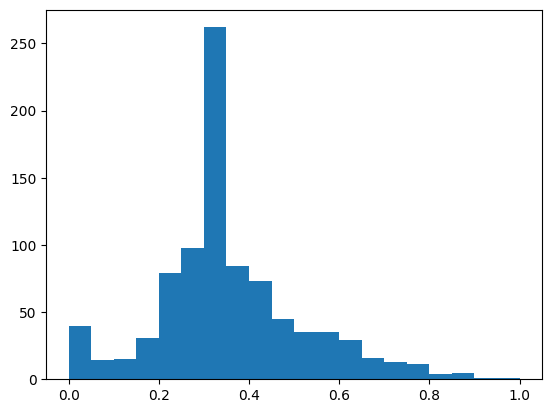

In [55]:
plt.hist(df_minmax["Age"] , bins = 20)

# rOBUST sCALER:(lot of advanatges) (outlier best)
it is used to scale the feature to medain and qunatile range means inter qunatile range
iqr = 75 - 25 qunatiles
x_scaled = (x - x.meadin) /iqr

In [56]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df) ,  columns = df.columns)
df_robust_scaler

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

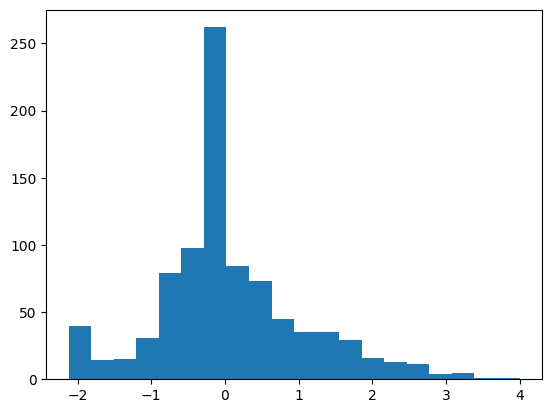

In [58]:
plt.hist(df_robust_scaler["Age"] , bins = 20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

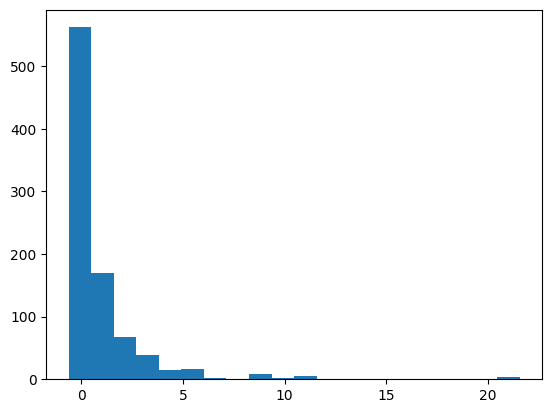

In [59]:
plt.hist(df_robust_scaler["Fare"] , bins = 20)

# Guassain Transformation

## How to covert the disturbution into normal disturbution we use these procedures
* logarithm transformation
* reciprocal transfomartion
*  square root transformation
*  exonepail transformation
*   box cox transoformation

In [60]:
df2 =  pd.read_csv("titanic.csv", usecols=["Pclass","Age","Fare","Survived"])

In [64]:
df2["Age"] = df2["Age"].fillna(df2.Age.median())

In [65]:
df2.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [73]:
import scipy.stats as stat
import pylab
import seaborn as sns

In [82]:
#### If u want to check whther dtaa i gussain disurbuted we plot
## QQ PLOT
def plot_data(df2,feature):
    plt.figure(figsize =(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df2[feature])
    plt.grid()
    plt.subplot(1,2,2)
    stat.probplot(df2[feature] , dist = "norm", plot = pylab)
    plt.show()           

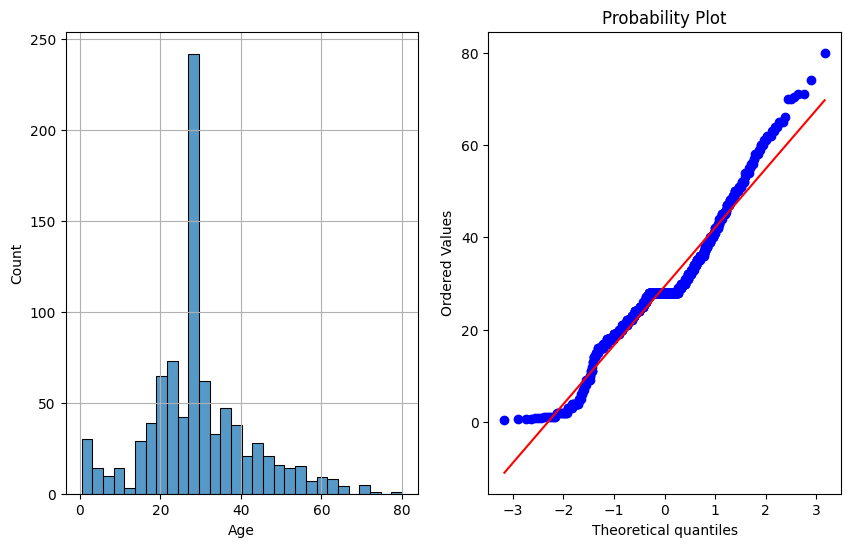

In [83]:
plot_data(df2 , "Age")

## to check whether what i am seeing its correct or not

### Logarithm Transformation(best work on skwed data)

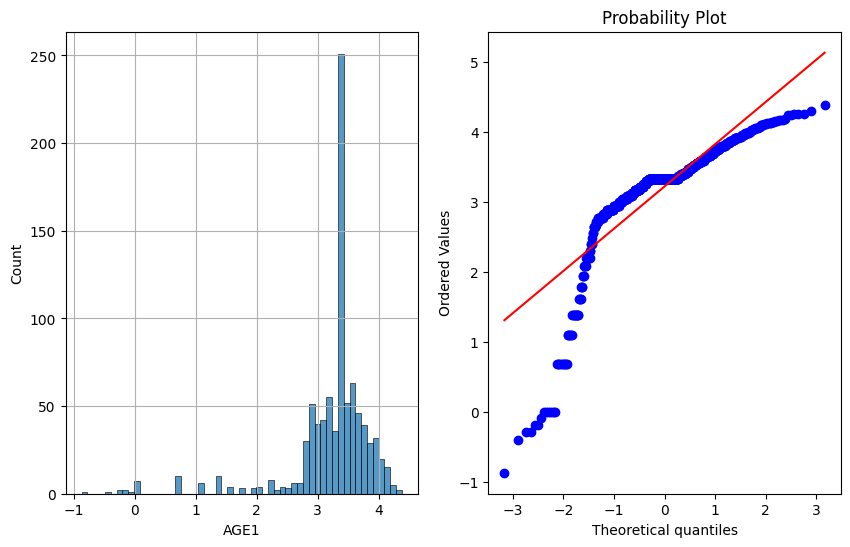

In [84]:
import numpy as np
df2["AGE1"] = np.log(df2["Age"])
plot_data(df2,"AGE1")

In [85]:
### So this techinque doesnot work in this data 

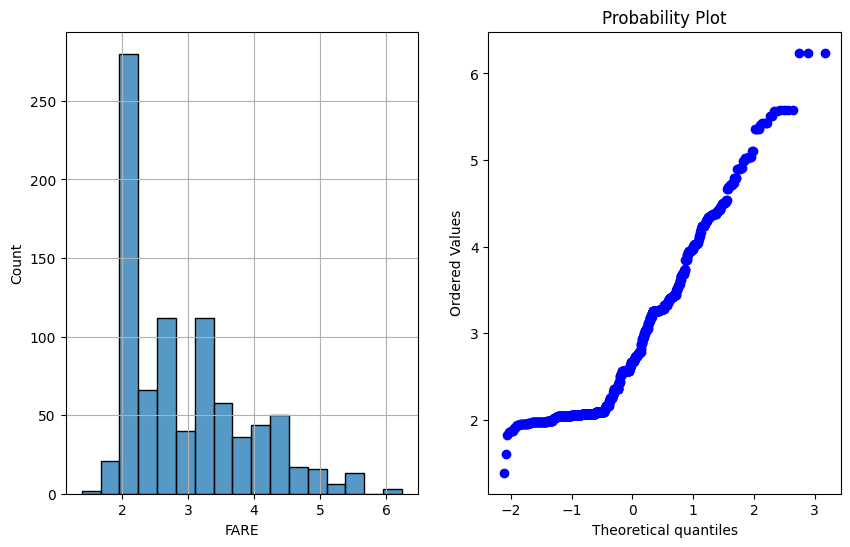

In [87]:
plot_data(df2,"FARE")

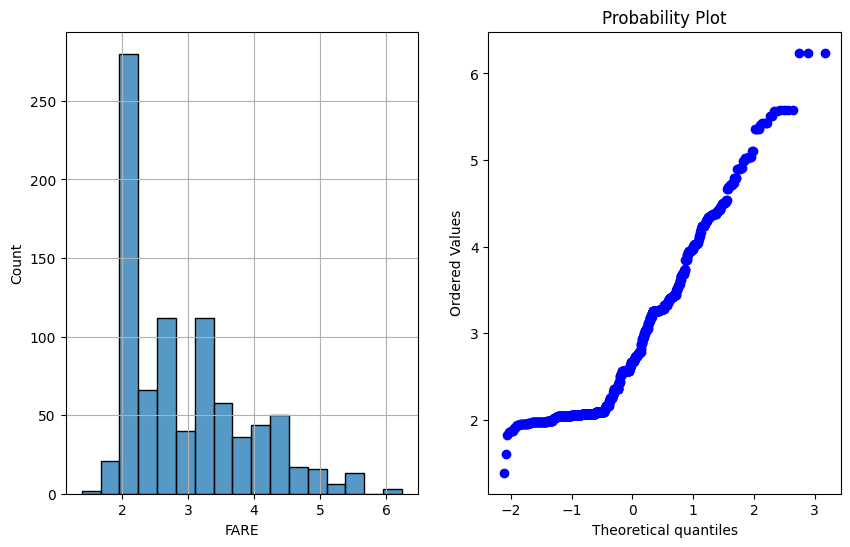

In [86]:
df2["FARE"] = np.log(df2["Fare"])
plot_data(df2,"FARE")

# Reciprocal Transformation

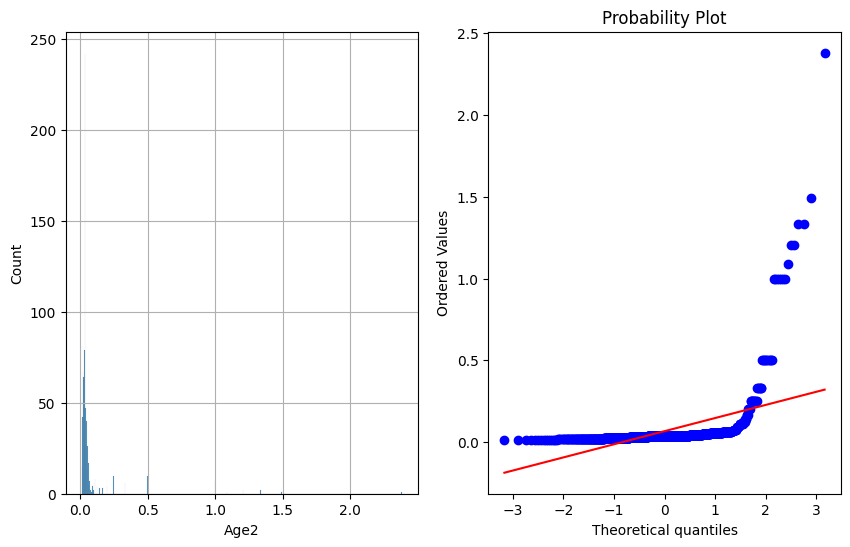

In [88]:
df2["Age2"] = 1/df2.Age
plot_data(df2,"Age2")

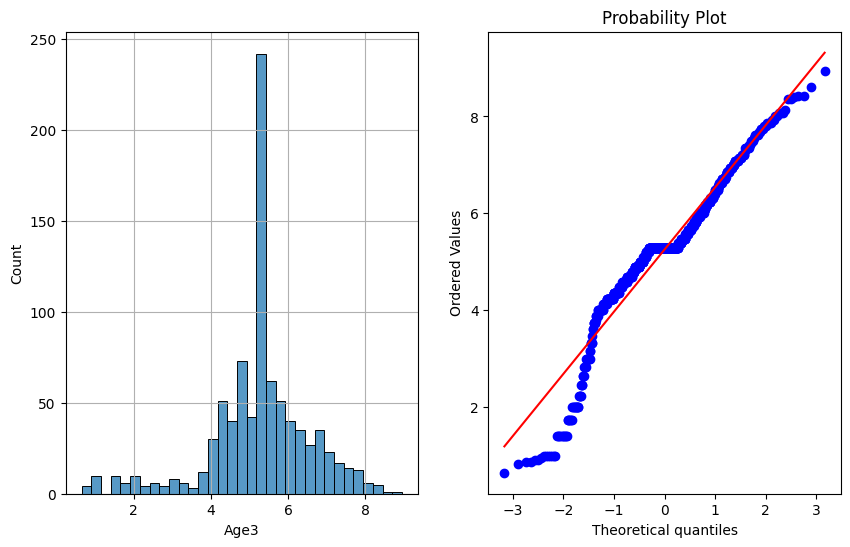

In [89]:
### Square root transformation
df2["Age3"] = df2.Age**(1/2)
plot_data(df2,"Age3")

# exonepail transformation

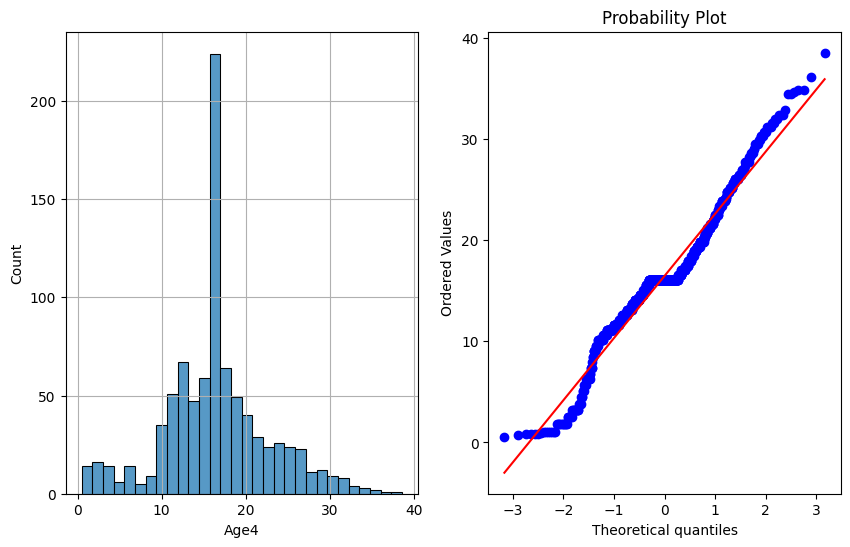

In [90]:
df2["Age4"] = df2.Age**(1/1.2)
plot_data(df2,"Age4")

# box cox transoformation

In [91]:
df2["Age5"],parameter = stat.boxcox(df2["Age"])

In [92]:
print(parameter)

0.796453129010849


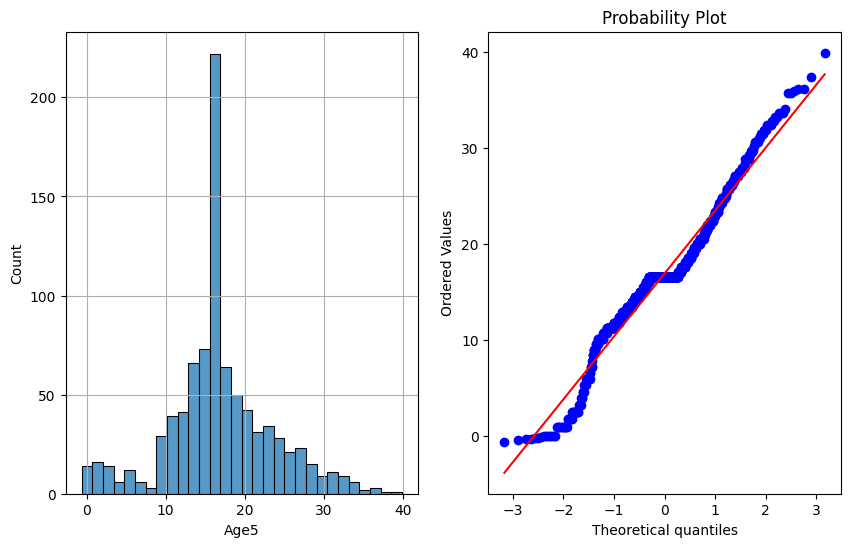

In [93]:
plot_data(df2,"Age5")

In [94]:
df2["Fare2"],parameter = stat.boxcox(df2["Fare"])

ValueError: Data must be positive.

In [ ]:
plot_data(df2,"Age5")